<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab, you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
house = pd.read_csv('datasets/sacramento_real_estate_transactions.csv')

### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. **Report any notable findings.**

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [6]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [8]:
# check the longitude 
house[house['longitude'] >= 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [9]:
# check the latitude
house[house['latitude'] <= 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [10]:
# fixing the latitude and longtitude
house.loc[703,"longitude"] = -121.503471
house.loc[703,"latitude"] = 38.668433

In [11]:
# checking for negative price 
house[house['price'] <= 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,38.668433,-121.503471


In [12]:
# fixing the price 
house.loc[703,'price'] = house.loc[703,'price']*-1

In [13]:
# checking for sq_ft
house[house['sq__ft'] <= 0]

# found the issue on sq_ft: important features for further prediction on price
# since sq_ft is important to predic the price, I decided not to drop a column and decided to drop rows that contained <=0 sq_ft

house = house[house['sq__ft'] > 0]

# check 
house[house['sq__ft'] <= 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [14]:
# checking for beds and baths that <=0 
# finding the zip that starts with '0'
house.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,95761.400984,3.247232,1.961870,1591.892989,229471.130381,38.576931,-121.378533
std,85.357516,0.849012,0.669367,663.908347,119897.576889,0.126352,0.119730
min,95603.000000,1.000000,1.000000,484.000000,2000.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1144.000000,148750.000000,38.473814,-121.451444
50%,95820.000000,3.000000,2.000000,1419.000000,207973.000000,38.591618,-121.404999
75%,95828.000000,4.000000,2.000000,1851.000000,285000.000000,38.674864,-121.325730
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


In [15]:
house['city'].unique()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'RANCHO MURIETA', 'WILTON', 'GREENWOOD', 'FAIR OAKS',
       'PLACERVILLE', 'MEADOW VISTA', 'ROSEVILLE', 'LINCOLN',
       'CAMERON PARK', 'ROCKLIN', 'LOOMIS', 'AUBURN', 'EL DORADO HILLS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'DIAMOND SPRINGS', 'COOL',
       'WALNUT GROVE', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

In [16]:
house['state'].unique()

array(['CA'], dtype=object)

In [17]:
house['type'].unique()

array(['Residential', 'Condo', 'Multi-Family'], dtype=object)

In [18]:
# type of the house is important factor to pricing strategy , decided to make it into dummy variables
house = pd.get_dummies(house, columns=['type'])
house.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False,False,True
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,False,True
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,False,True
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,False,True
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,False,True


When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [20]:
house.to_csv('datasets/house_cleaned_data.csv')

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR (Simple Linear Regression) model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

In [22]:
house.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft',
       'sale_date', 'price', 'latitude', 'longitude', 'type_Condo',
       'type_Multi-Family', 'type_Residential'],
      dtype='object')

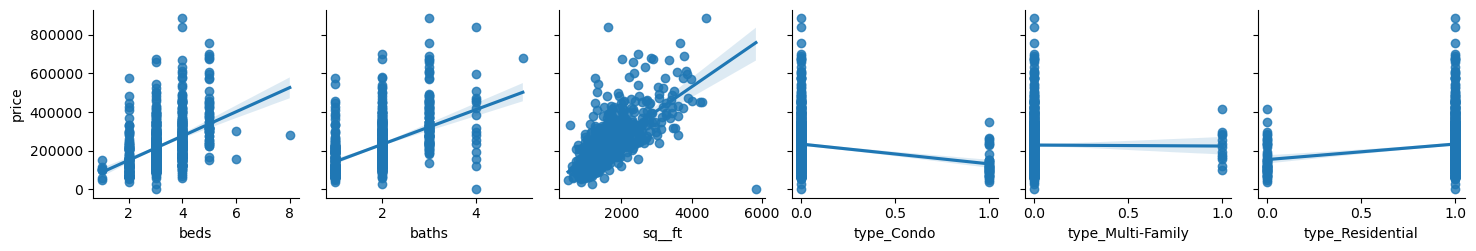

In [23]:
# relationship between price and beds/baths/sq__ft, and type
feature_cols = ['beds', 'baths', 'sq__ft', 'type_Condo','type_Multi-Family', 'type_Residential']
sns.pairplot(house, x_vars=feature_cols, y_vars='price', kind ='reg');

# find out: beds, baths, sq__ft are positive variables with price of the house
# Residential's price are more vary from low pricing to high one 
# while condo and multi-family houses's price are low to middle ranges 

### 4. Which variable would be the best predictor of `y` in an SLR (Simple Linear Regression) model? Why?

In [25]:
house.corr(numeric_only = True)

,zip,beds,baths,sq__ft,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential
zip,1.000000,-0.070211,-0.101987,-0.100688,-0.219531,-0.135006,-0.562511,0.018420,0.028368,-0.030478
beds,-0.070211,1.000000,0.653718,0.696080,0.443391,-0.105579,0.053598,-0.358627,0.182435,0.223258
baths,-0.101987,0.653718,1.000000,0.724306,0.502191,-0.080098,0.106447,-0.188521,0.212484,0.058635
sq__ft,-0.100688,0.696080,0.724306,1.000000,0.693902,-0.102558,0.134795,-0.213384,0.087423,0.143481
price,-0.219531,0.443391,0.502191,0.693902,1.000000,0.058632,0.278304,-0.186807,-0.005252,0.166809
latitude,-0.135006,-0.105579,-0.080098,-0.102558,0.058632,1.000000,0.345702,0.076806,0.021224,-0.078187
longitude,-0.562511,0.053598,0.106447,0.134795,0.278304,0.345702,1.000000,-0.009309,0.027231,-0.005536
type_Condo,0.018420,-0.358627,-0.188521,-0.213384,-0.186807,0.076806,-0.009309,1.000000,-0.029377,-0.863987
type_Multi-Family,0.028368,0.182435,0.212484,0.087423,-0.005252,0.021224,0.027231,-0.029377,1.000000,-0.477915
type_Residential,-0.030478,0.223258,0.058635,0.143481,0.166809,-0.078187,-0.005536,-0.863987,-0.477915,1.000000


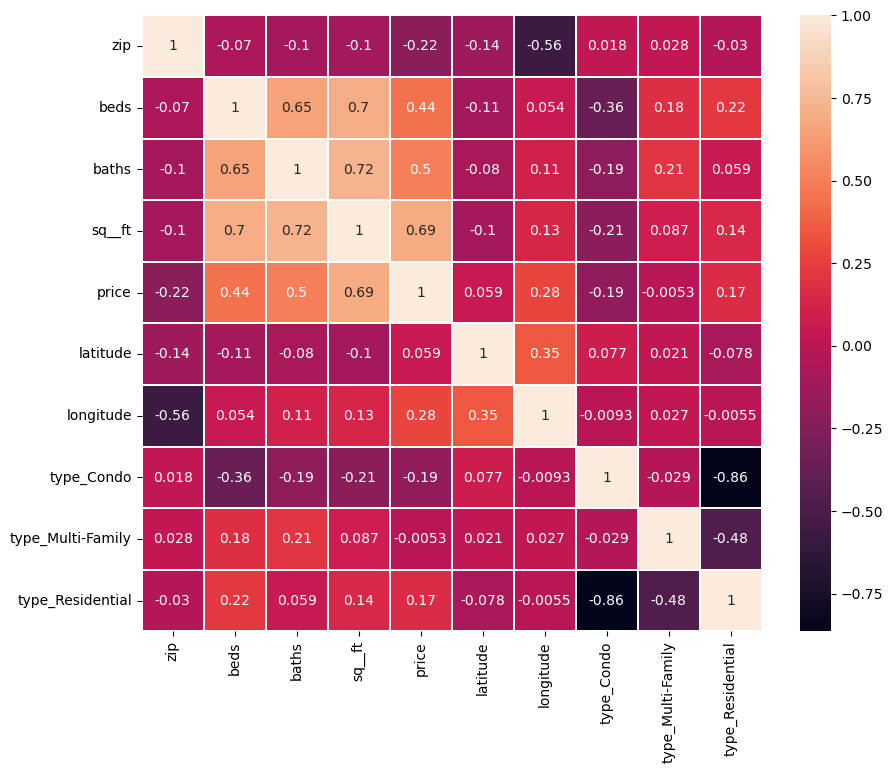

In [26]:
# Visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(house.corr(numeric_only=True), annot = True, linewidth = 0.2)
plt.yticks(rotation =0)
plt.show()

# find out: from the correlation below, the best predictor of y in an SLR is sq__ft with the highest correlation of 0.72.

### 5. Write a function that will take in two lists, `x` and `y`, and returns the intercept and slope coefficients that minimize SSE (Sum of Squared Errors). 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Question #4.**
- **Report the slope and intercept.**

In [28]:
from scipy.stats import pearsonr
def lin_reg(x, y):
    beta1 = (pearsonr(x, y)[0] * np.std(y)) / np.std(x)
    beta0 = np.mean(y) - (beta1 * np.mean(x))
    return beta0, beta1

In [29]:
beta0, beta1 = lin_reg(house['sq__ft'], house['price'])

In [30]:
beta1

125.3141825751013

In [31]:
# Test your function on price and the variable you determined was the best predictor in Question #4 
y = beta0 + beta1 * house['sq__ft'][10]
y

143894.95368728702

In [32]:
# The true price
house['price'][10], house['sq__ft'][10]

(100309, 909)

### 6. Now interpret the intercept and the slope from Q5

**Intercept**: The intercept indicates that when there is an zero sq_ft, the price of the house (or in this case it can be called just an expty land) is approximately 30,000. 

**Slope**: For a unit increase in X or the sq feet of the house area, the price will be increased by 125.31 dollars.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

**For using for prediction**: we can use to make a prediction of price by using the slope and intercept to show us the 
best fit line for the prediction

**For using for inference**: we can use to make it inference by set a null hypothesis (H0: B1 = 0) and alternative hypothesis (H0: B1 != 0).
(H0: B1 = 0) showing that there is no impact from X(independent variable) to y(valeu that want to predict)

### 8: Using the model you came up with in Question #5, calculate and plot the residuals.

In [38]:
# changing X into array from Dataframe and assign to x variable
X = house[['sq__ft']]
y = house['price'] 

linear = LinearRegression()
model = linear.fit(X, y)
y_preds_sq_ft = model.predict(X)

# assigning prediction back to the dataframe
house['Prediction_sq'] = y_preds_sq_ft

#find the residuals 
house['residuals'] = house['price'] - house['Prediction_sq']


<Figure size 1000x1000 with 0 Axes>

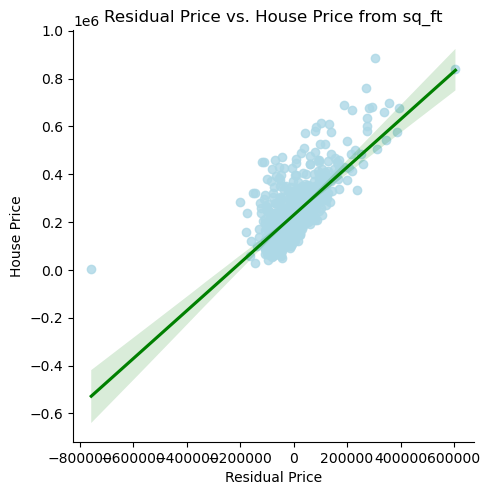

In [39]:
X = house['sq__ft']
y = house['price']
lin_reg(X,y)

plt.figure(figsize=(10,10))
sns.lmplot(x='residuals', y='price', data=house, scatter_kws={"color": "lightblue"}, line_kws={"color": "green"});

# plot
plt.title('Residual Price vs. House Price from sq_ft')
plt.xlabel('Residual Price')
plt.ylabel('House Price')
plt.show();

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [42]:
#### already did above , thank you, sorry for inconvenience

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [44]:
house['baths'].value_counts()

baths
2    507
1    178
3    110
4     17
5      1
Name: count, dtype: int64

In [45]:
house['beds'].value_counts()

beds
3    392
4    235
2    125
5     49
1      9
6      2
8      1
Name: count, dtype: int64

In [46]:
house.head()
# I did only dummies on 'type' columns: it make sense becuase the I want to know the type of houses , what are they and above it also shown 
# that the price of each type of houses are different in terms of ranges.

# for now I think this is make sense but in the future if there is any chance that I can make use of dummies variables on beds and baths 
# I will convert them to dummies variables in the future 

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential,Prediction_sq,residuals
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False,False,True,134747.018359,-75525.018359
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,False,True,176226.012792,-108014.012792
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,False,True,129734.451056,-60854.451056
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,False,True,136752.045281,-67445.045281
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,False,True,129859.765239,-47959.765239


### 11. Build what you think may be the best MLR (Multiple Linear Regression) model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [48]:
# importing 
from sklearn.linear_model import LinearRegression

In [49]:
house.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft',
       'sale_date', 'price', 'latitude', 'longitude', 'type_Condo',
       'type_Multi-Family', 'type_Residential', 'Prediction_sq', 'residuals'],
      dtype='object')

In [50]:
feature_cols = ['beds', 'baths', 'sq__ft', 'type_Multi-Family', 'type_Residential', 'type_Condo']

In [51]:
# Create X and y
X = house[feature_cols]
y = house['price']

# Instantiate and fit
linreg = LinearRegression()
model = linreg.fit(X,y)
predictions = model.predict(X)

# Look at the coefficients
print(linreg.intercept_)
print(pd.Series(linreg.coef_, index= feature_cols))
print(f'score of the model {model.score(X, y)}')

23471.912637209345
beds                -14236.580214
baths                 8199.143403
sq__ft                 130.589178
type_Multi-Family   -27954.305061
type_Residential     30907.928243
type_Condo           -2953.623181
dtype: float64
score of the model 0.4919323552037267


In [52]:
# find out why beds have negative coefficient to prices (becuase it seems conflict with the reality)
  # assumption : may be due to different types of houses? 

# write a function to check the data
def all_info(a,b,feature):
    
    # Instantiate and fit
    linreg = LinearRegression()
    model = linreg.fit(a,b)
    predictions = model.predict(a)

    # Look at the coefficients
    print(f'Intercept: {linreg.intercept_}')
    print(f'Coefficient: \n{pd.Series(linreg.coef_, index= feature)}')
    print(f'Score of the model: {model.score(a,b)}')

In [53]:
# check for condo
condo = house[house['type_Condo']==1]
feature_cols_condo = ['beds', 'baths', 'sq__ft']
X_condo = condo[feature_cols_condo]
y_condo = condo['price']

all_info(X_condo,y_condo,feature_cols_condo)


Intercept: -16265.265646094893
Coefficient: 
beds     -36104.191574
baths      8317.091882
sq__ft      211.150720
dtype: float64
Score of the model: 0.6598012731639837


In [54]:
# check for Multifam
fam = house[house['type_Multi-Family']==1]

feature_cols_fam = ['beds', 'baths', 'sq__ft']
X_fam = fam[feature_cols_fam]
y_fam = fam['price']

all_info(X_fam,y_fam,feature_cols_fam)

Intercept: 225488.8533986625
Coefficient: 
beds     -41942.325250
baths    -23995.638916
sq__ft      127.022786
dtype: float64
Score of the model: 0.08120999113650762


In [55]:
# check for Res
res = house[house['type_Residential']==1]

feature_cols_res = ['beds', 'baths', 'sq__ft']
X_res = res[feature_cols_res]
y_res = res['price']

all_info(X_res,y_res,feature_cols_res)

Intercept: 47562.60675833959
Coefficient: 
beds     -11920.798931
baths      9285.505214
sq__ft      128.757514
dtype: float64
Score of the model: 0.47948148646646593


In [56]:
# Questions: should we categorize the type of houses and analysis?

    # from the above coefficient of beds from all the breakdown of different type of houses 
    # I noticed that there are still a negative coefficient between the beds al type of houses and a baths in Multi-famiily house,
    # which still strange in terms of reality, however, there are three reasons that I can think of when beds are more and price will be less 
    # is when the land size is small , poor location, and houses are old.

# Finally, we can try break more on location to find out the reliable regression model.
# But for now, will be using the model that did not breakdown into different type of houses.

### 12. Plot the true price vs the predicted price to evaluate your MLR (Multiple Linear Regression) visually.

You can use matplotlib or seaborn.

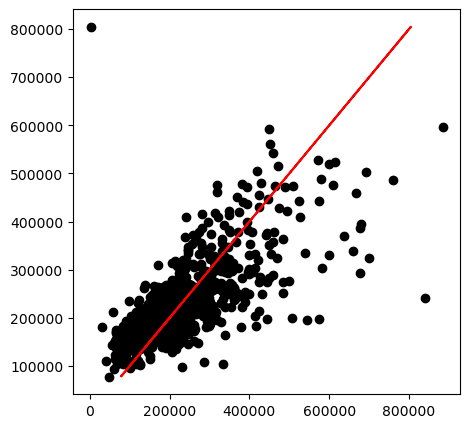

In [58]:
linear = LinearRegression()
model = linear.fit(X, y)
y_preds_X = model.predict(X)

plt.figure(figsize=(5,5))
plt.scatter(y,y_preds_X, c='k');
plt.plot(y_preds_X, y_preds_X, color='r');

### 13. List the five assumptions for an MLR (Multiple Linear Regression) model. 

Indicate which ones are the same as the assumptions for an SLR model. 

1. Linearity - This assumption states that there should be a linear relationship between the independent variables (X) 
and the dependent variable (y). In other words, the change in the dependent variable should be proportional to the
change in the independent variable. This can all be checked with scatterplots or partial regression plots.

2. Independence (of observations) - This assumes each data point is independent of the others. There should be NO 
relationship between the residuals of any two observations. This is often true by the very nature of data collection,
but can be violated in time series or clustered data. Violations can lead to autocorrelation.

3. Normality (of residuals) - The residuals (differences between the observed and the predicted values) should be
normally distributed. THIS DOES NOT MEAN THE RAW DATA NEEDS TO BE NORMAL, JUST THE RESIDUALS. This can be checked
using Q-Q plots or statistical tests like the Shapiro-Wilk test. Mild violations of normality are generally not
severe for large sample sizes.

4. Equal variances of residuals (Homoscedasticity) - The assumption that the variance of residuals should be constant
across all levels of the independent variables. In other words, the spread of residuals should be roughly the same
throughout the data. We check by plotting residuals against our predicted values. Violations lead to heteroscedasticity,
which can then impact or affect the standard errors of the coefficients.

5. No Multicollinearity - The independent variables should not be highly correlated to each other, as it will increase the coefficient
in the equation, which making difficulty in making interpretation and estimation will be unstable.

**ALL are the same for SLR model except for 'No Multicollinearity' due to SLR model have only a single variable**

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

{'beds': 0.4433914907103769,
 'baths': 0.5021908662465959,
 'sq__ft': 0.6939016944378689,
 'type_Multi-Family': -0.0052516675753593,
 'type_Residential': 0.1668085103247624,
 'type_Condo': -0.18680680135341476}

<Figure size 500x500 with 0 Axes>

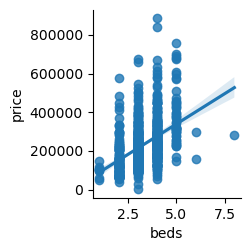

<Figure size 500x500 with 0 Axes>

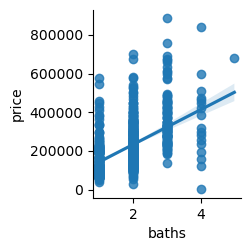

<Figure size 500x500 with 0 Axes>

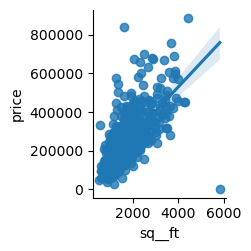

<Figure size 500x500 with 0 Axes>

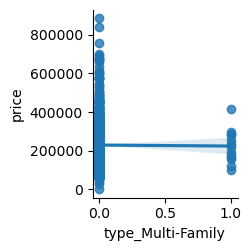

<Figure size 500x500 with 0 Axes>

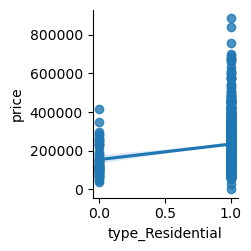

<Figure size 500x500 with 0 Axes>

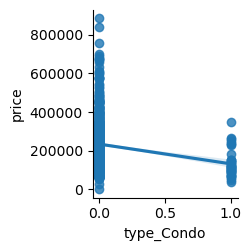

In [62]:
# check for linerity 

def lin_check(data, feature_cols):
    correlations = {}
    for n in feature_cols:
        correlations[n] = data[n].corr(data['price'])
        plt.figure(figsize=(5,5))
        sns.pairplot(data, x_vars=n, y_vars='price', kind ='reg');
    return correlations

lin_check(house, feature_cols)
# I think by the evidence below showing that the correlation between beds/bath/sq_ft are the top three highest correlation 
# I think they have linear relationship between them (price and beds/bath/sq_ft)


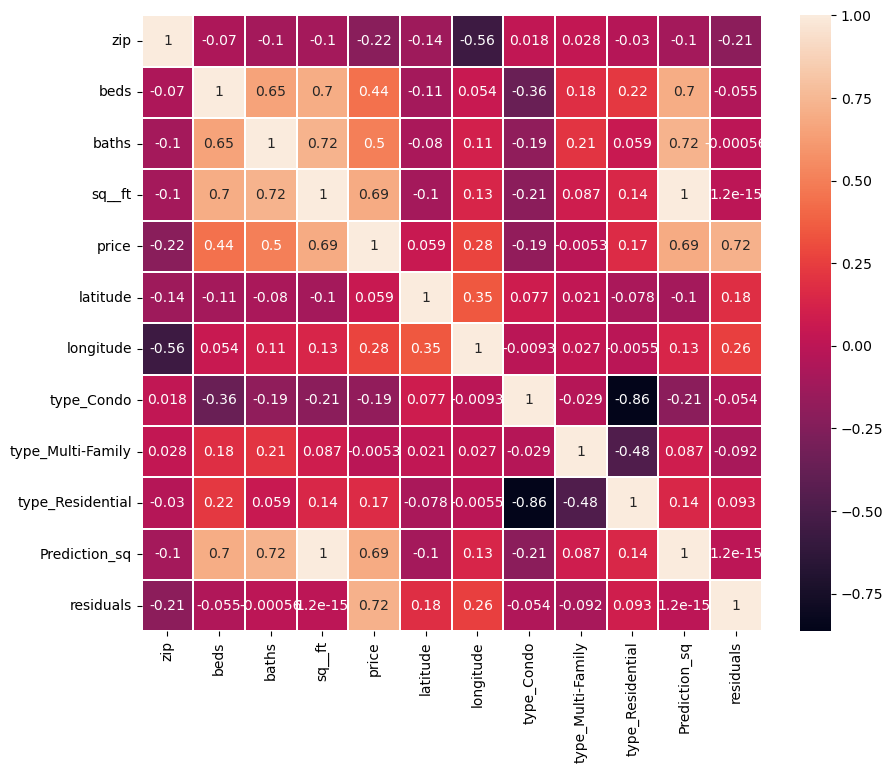

In [63]:
# checking for multicollinearity

# Visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(house.corr(numeric_only=True), annot = True, linewidth = 0.2)
plt.yticks(rotation =0)
plt.show()

# I found that beds and baths, beds and sq_ft, and baths and sq_ft have a high correlation, 
# therefore checking for multicollinearity is not passed.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [65]:
import statsmodels.api as sm

X = sm.add_constant(X)

# change boolean into int 
X['type_Condo']= X['type_Condo'].astype(int)
X['type_Residential']= X['type_Residential'].astype(int)
X['type_Multi-Family'] = X['type_Multi-Family'].astype(int)

model = sm.OLS(y,X).fit()
model.summary()

# showing only point estimates, standard errors, t-scores, p-values, and 95% confidence
summary_df = pd.DataFrame({
    'Coefficient': model.params,
    'Standard Errors': model.bse,
    't-scores': model.tvalues,
    'p-values': model.pvalues,
    'Lower 95% CI': model.conf_int()[0],
    'Upper 95% CI': model.conf_int()[1]
})

summary_df

,Coefficient,Standard Errors,t-scores,p-values,Lower 95% CI,Upper 95% CI
const,17603.934478,12130.343960,1.451231,1.471041e-01,-6206.814006,41414.682962
beds,-14236.580214,5462.588068,-2.606197,9.324199e-03,-24959.137710,-3514.022718
baths,8199.143403,6951.898326,1.179411,2.385822e-01,-5446.793025,21845.079831
sq__ft,130.589178,7.339105,17.793612,5.268966e-60,116.183191,144.995164
type_Multi-Family,-22086.326902,20227.183461,-1.091913,2.751972e-01,-61790.425937,17617.772133
type_Residential,36775.906402,7985.256855,4.605476,4.779897e-06,21101.582313,52450.230491
type_Condo,2914.354978,11864.900637,0.245628,8.060325e-01,-20375.352699,26204.062655


### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 


In [67]:
## As a function and if splitting data...
def r2_adj(y, y_pred, p):
    n = len(y)
    y_mean = np.mean(y)
    numerator = np.sum(np.square(y - y_pred)) / (n - p - 1)
    denominator = np.sum(np.square(y - y_mean)) / (n - 1)
    result =  round((1 - numerator / denominator),4)
    print(f'Adjusted R-Square: {result}')

# y: The true values of the dependent variable.
# y_pred: The predicted values from model.
# p: The number of predictors (independent variables) in model.


In [68]:
r2_adj(y, y_preds_X, X.shape[1])

Adjusted R-Square: 0.4875


### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mae_rmse_r2(y,y_preds):
    # MAE
    mae = mean_absolute_error(y, y_preds)
    print(f'Mean absolute error (MAE): {mae}')

    # RMSE
    mse = mean_squared_error(y, y_preds)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # R-Square 
    r_squared = r2_score(y, y_preds)
    print(f"R-squared: {r_squared}")


In [71]:
house['price'].describe()

count       813.000000
mean     229471.130381
std      119897.576889
min        2000.000000
25%      148750.000000
50%      207973.000000
75%      285000.000000
max      884790.000000
Name: price, dtype: float64

In [72]:
mae_rmse_r2(y,y_preds_X)

# How well does your model perform?
    # MAE: On average the predicted house prices are different from the actual prices by about $60,223.
    # This error is quite huge compared to the price ranging between $2,000 to $884,790
    
    # RMSE: The model predictions are on average $86,281 away from the actual price, which is too much in sense of 
    # the price ranging between $2,000 to $884,790

    # R-squared: An R² value of 0.48 indicates that the model explains less than half of the variability in the data. 
    # meaning model did not capture all the factor that really affect the house prices 


Mean absolute error (MAE): 59088.86475088252
Root Mean Squared Error (RMSE): 85409.05512606801
R-squared: 0.4919323552037267


### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [74]:
def regression_metrics(X, y):

    linear = LinearRegression()
    model = linear.fit(X, y)
    y_preds = model.predict(X)

    # MAE
    mae = mean_absolute_error(y, y_preds)
    print(f'Mean absolute error (MAE): {mae}')

    # RMSE
    mse = mean_squared_error(y, y_preds)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # R-Square 
    r_squared = r2_score(y, y_preds)
    print(f"R-squared: {r_squared}")

In [75]:
# model are adjusted in Q11 by breaking dowm types of houses

# condo
regression_metrics(condo[feature_cols_condo], condo['price'])

print()

# for multi-family 
regression_metrics(fam[feature_cols_fam], fam['price'])

print()

# for Residential 
regression_metrics(res[feature_cols_res], res['price'])

Mean absolute error (MAE): 29711.379902688117
Root Mean Squared Error (RMSE): 39181.22708476476
R-squared: 0.6598012731639837

Mean absolute error (MAE): 65199.637265295576
Root Mean Squared Error (RMSE): 78335.96023608508
R-squared: 0.08120999113650762

Mean absolute error (MAE): 60222.94523818579
Root Mean Squared Error (RMSE): 86824.39861468364
R-squared: 0.47948148646646593


In [76]:
# How well does your model perform?
    # MAE: On average the predicted house prices are different from the actual prices by about $29,711 from the condo model.
    # which is the least error compared to the rest of the house type.
    # This error is still quite huge compared to the price ranging between $2,000 to $884,790 but better than the previous model 
    
    # RMSE: The model predictions are on average $29,711 away from the actual price, which is too much in sense of 
    # the price ranging between $2,000 to $884,790

    # R-squared: An R^2 value of 0.65 indicates that the model explains more than half of the variables, comparing to the uncategorized model 
    # the condo model is quit good, however, the other two models still have a low R^2 value.

# conclusion: even splitting the model into different types of houses, it still not a good model due to high errors and mostly low R^2

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

**The model is in the high bias position:** the model has low R^2, which representing that the model did not capture the complexity 
of the data without remember it, plus with the ver high MAE and RMSE, showing that the model will not provide the accurate predictions 
due to high errors.
